In [2]:
import cv2 # opencv 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Loading Image

In [3]:
img = datasets.load_sample_image("china.jpg")

In [4]:
img

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

# Filters

In [5]:
edgeDetectionKernel3channel = np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]])
sharpenKernel3channel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
blurKernel3channel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
sobelKernel3channel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
outlineKernel3channel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
deblurKernel3channel = np.array([[0, 2, 0], [2, 4, 2], [0, -2, 0]])

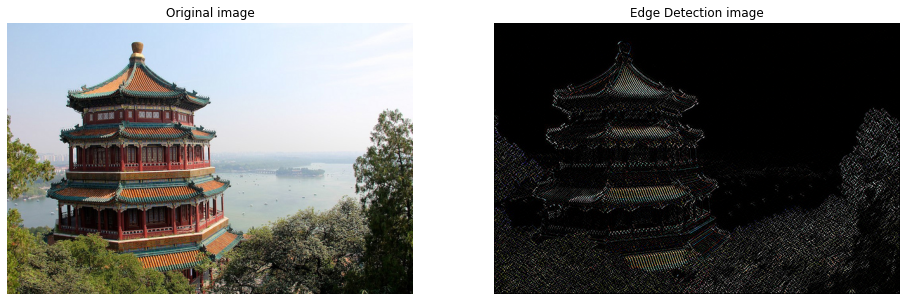

In [6]:
filtered_image = cv2.filter2D(img, -1, edgeDetectionKernel3channel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Edge Detection image')
ax2.imshow(filtered_image)

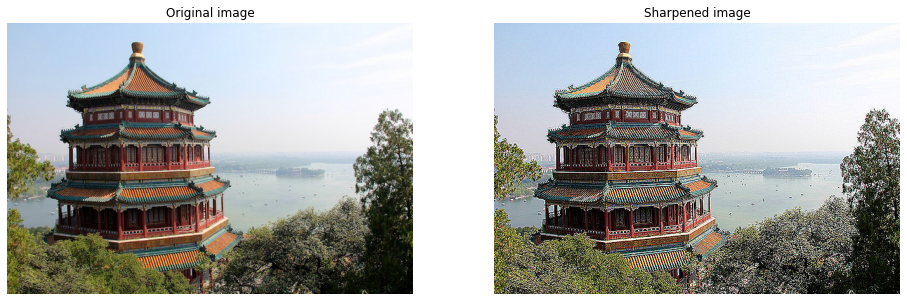

In [7]:
filtered_image = cv2.filter2D(img, -1, sharpenKernel3channel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Sharpened image')
ax2.imshow(filtered_image)

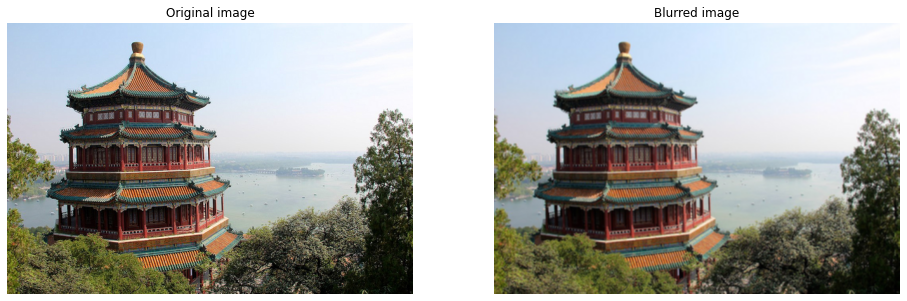

In [8]:
filtered_image = cv2.filter2D(img, -1, blurKernel3channel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Blurred image')
ax2.imshow(filtered_image)

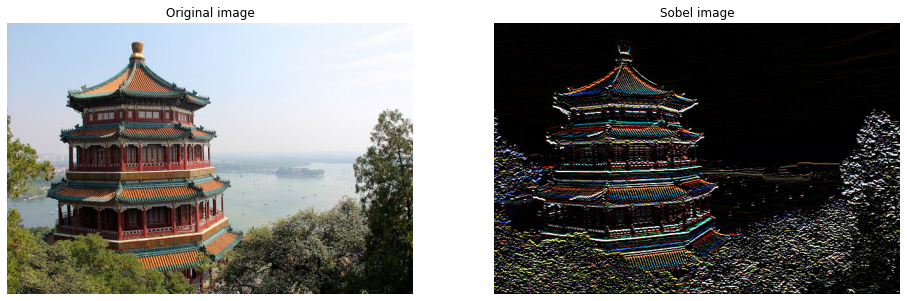

In [9]:
filtered_image = cv2.filter2D(img, -1, sobelKernel3channel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Sobel image')
ax2.imshow(filtered_image)

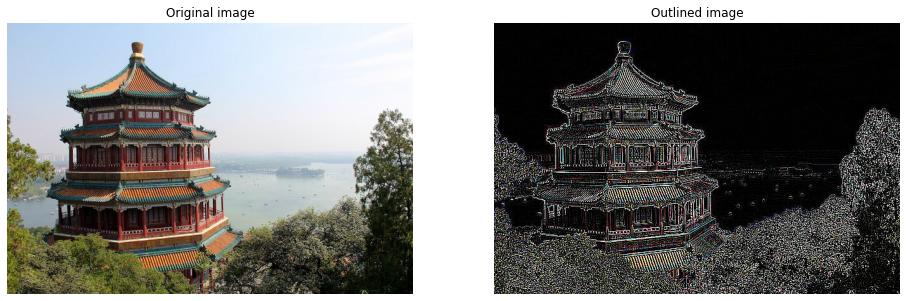

In [10]:
filtered_image = cv2.filter2D(img, -1, outlineKernel3channel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Outlined image')
ax2.imshow(filtered_image)

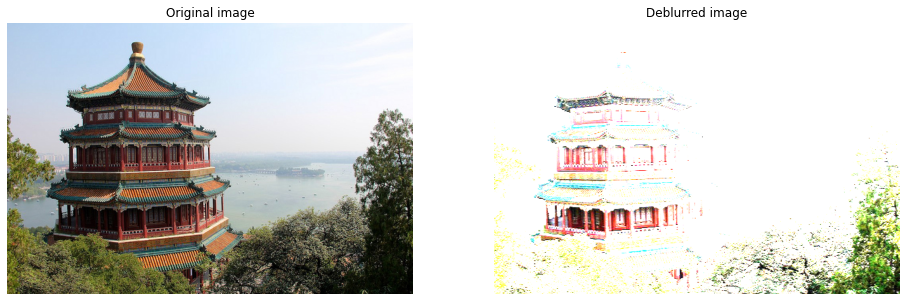

In [11]:
filtered_image = cv2.filter2D(img, -1, deblurKernel3channel)

fig = plt.figure(figsize=(16, 25))
ax1 = fig.add_subplot(2,2,1)
ax1.axis("off")
ax1.title.set_text('Original image')
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.axis("off")
ax2.title.set_text('Deblurred image')
ax2.imshow(filtered_image)

In [12]:
def convolution(image, kernel):
    img_row, img_col, img_channel = image.shape
    kernel_size = kernel.shape[0]
    padding_width = (kernel_size - 1) // 2
    output = np.zeros(image.shape, dtype = np.uint8)
    padded_img = np.zeros((img_row + 2*padding_width, img_col + 2*padding_width, img_channel), dtype = np.uint8)

    padded_img[padding_width : padding_width + img_row, padding_width : padding_width + img_col] = image
    for i in range(img_row):
        for j in range(img_col):
            output[i, j, 0] = np.sum(padded_img[i : i+kernel_size, j : j+kernel_size, 0] * kernel) // (kernel_size * kernel_size)
            output[i, j, 1] = np.sum(padded_img[i : i+kernel_size, j : j+kernel_size, 1] * kernel) // (kernel_size * kernel_size)
            output[i, j, 2] = np.sum(padded_img[i : i+kernel_size, j : j+kernel_size, 2] * kernel) // (kernel_size * kernel_size)
    return output

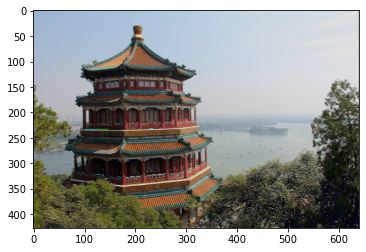

In [13]:
plt.imshow(convolution(img, deblurKernel3channel))

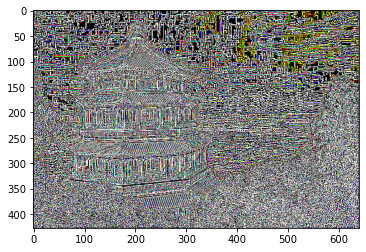

In [14]:
plt.imshow(convolution(img, outlineKernel3channel))

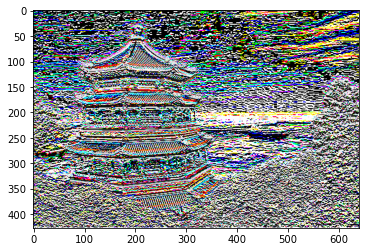

In [15]:
plt.imshow(convolution(img, sobelKernel3channel))

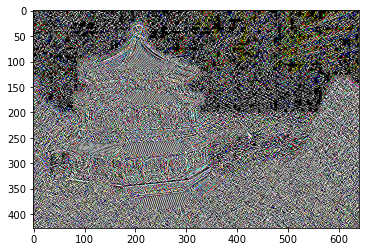

In [16]:
plt.imshow(convolution(img, edgeDetectionKernel3channel))

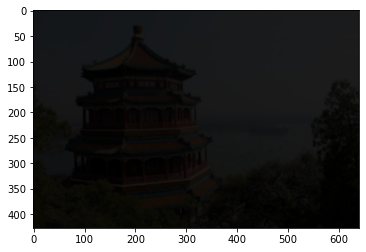

In [17]:
plt.imshow(convolution(img,  blurKernel3channel))

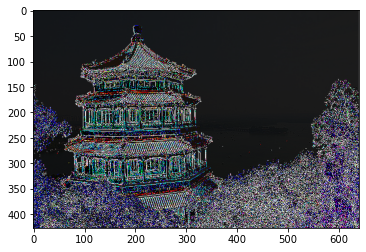

In [18]:
plt.imshow(convolution(img,  sharpenKernel3channel))